# Proyecto Integrador DS2 - Coderhouse 2024 - Comisión: 61665

### Descripción:
El Dataset elegido contiene datos medicos utilizados para predecir enfermedades cardiacas, para ellos se toma en cuenta diferentes atributos relacionados a la salud de los pacientes, como la edad, sexo y otras métricas medicas para los diagnoticos.


### Descripción de columnas del dataset:

- age: Edad del paciente (en años)
- sex: Sexo del paciente (1= hombre, 0 = mujer)
- cp: Tipo de dolor torácico (1-4)
- trestbps: Presión arterial en reposo (en mmHg al ingresar al hospital)
- chol: Colesterol en mg/dl
- fbs: Glucemia en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)
- restecg: Resultados de electrocardiograma en reposo (0-2)
- thalach: Frecuencia cardíaca máxima alcanzada
- exang: Angina inducida por el ejercicio (1 = sí, 0 = no)
- oldpeack: Depresión del segmento ST inducida por el ejercicio en relación con el reposo

### Fuente
Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: 
https://www.kaggle.com/datasets/krishujeniya/heart-diseae

### 1. Importación de Librerías y Carga de dataset

In [1]:
# Importamos las librerias que voy a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del dataset

df = pd.read_csv("heart-disease.csv", sep = ',')

In [3]:
# Previsualización del Dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Visualización de los primeros 5 registros
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Composición del dataframe (filas, columnas)
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

El Dataframe no contiene valores nulos

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


A partir de los datos arrojados por el describe, se puede evaluar que:
- La edad promedio es de 54 años
- desviación estandar de +-9 años
- rango de edad abarca desde los 29 años hasta los 77 años
- sex: El dataset tambien muestra un promedio del 68,3% (mean = 0,683168), en lo referido al sexo de los pacientes, indicando que el 68,3% se trata de pacientes masculinos.
- cp: percentil del cp (dolor toracico), muestra que el percentil 50 y 75 estan concentrado en los valores 1 y 2 de la muestra.
- Trestbps: Promedio de 131,62 mmHg, levemente por encima de los valores normales (120 mmHg) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Análisis de visualización

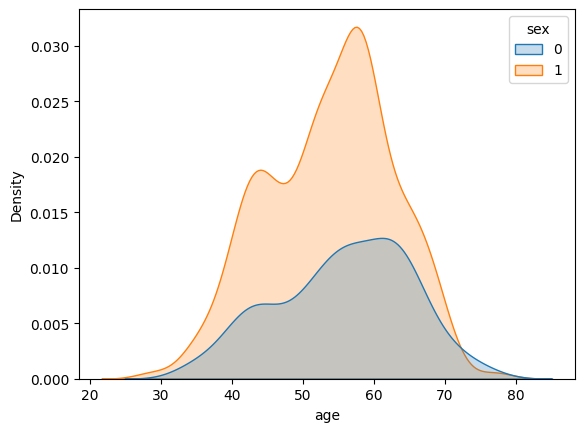

In [9]:
plt.figure()
sns.kdeplot(data = df,
            x='age',
            fill = True,
            hue = 'sex',
            bw_adjust=0.8)
plt.show()

Muestra de la densidad del data set a partir del sexo de los pacientes (1 = Hombre, 0 = Mujer) junto con la edad.

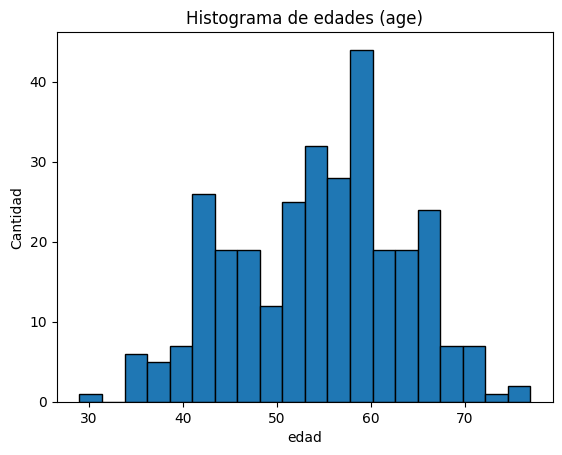

In [10]:
# Histograma de edades que arroja el dataset

plt.figure()
sns.histplot(data = df,
             x = 'age',
             bins= 20,
             alpha= 1)
plt.title('Histograma de edades (age)')
plt.xlabel('edad')
plt.ylabel('Cantidad')
plt.show()

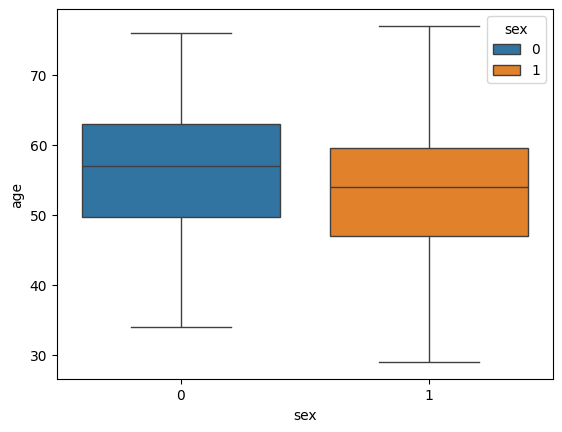

In [11]:
#Gráfico de Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'sex',
            y = 'age',
            hue = 'sex')
plt.show()

- El gráfico de boxplot muestra que el promedio de edad en los datos de pacientes mujeres (sex = 0), es de 55 a 60 años
- mientras que la edad promedio de los hombres (sex = 1) es de 50 a 53 años.

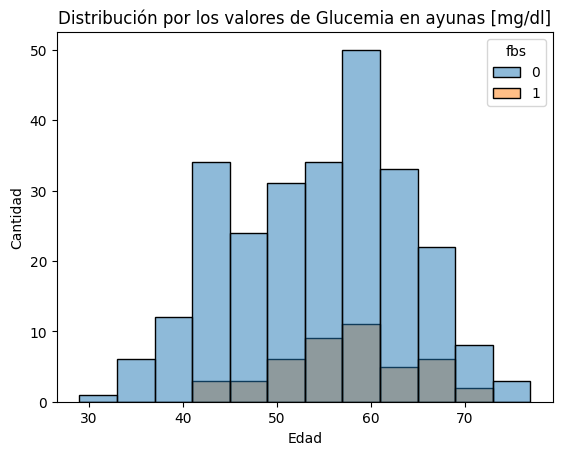

In [12]:
sns.histplot(data=df, 
             x='age', 
             hue='fbs')

plt.title('Distribución por los valores de Glucemia en ayunas [mg/dl]')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()

mediante el grafico de histogramas + el parametro "hue", podemos ver que entre los 55 a 60 años los pacientes ingresan al hospital con los valores de Glucemia ('fbs') por encima de los 120 mg/dl 

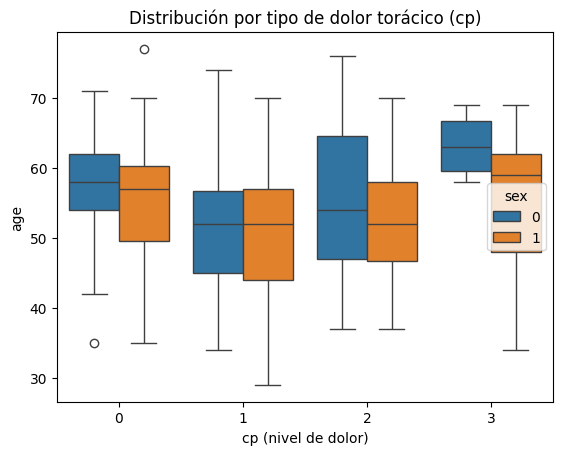

In [13]:
plt.figure()
sns.boxplot(data = df,
            x = 'cp',
            y = 'age',
            hue = 'sex')

plt.title('Distribución por tipo de dolor torácico (cp)')
plt.xlabel('cp (nivel de dolor)')
plt.ylabel('age')
plt.show()

Si consideramos que, 0 es un tipo de dolor bajo y 3 un tipo de dolor alto, se observa que, en promedio, las pacientes de sexo femenino mayores a 60 años son mas propensos a ingresar al hospital con un dolor toracico alto.

<Axes: xlabel='age', ylabel='thalach'>

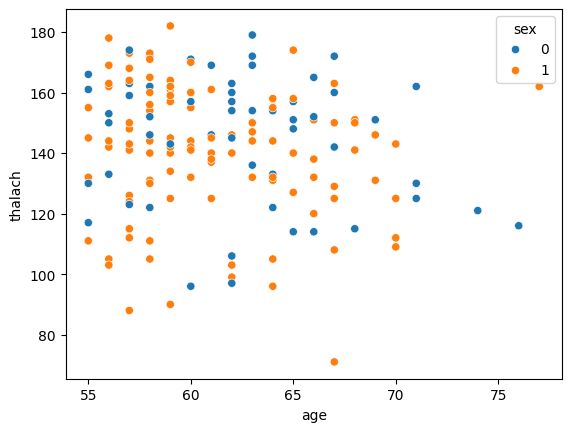

In [14]:
df_2 = df.loc[df['age']>54]

sns.scatterplot(data = df_2,
                x = 'age',
                y = 'thalach',
                hue = 'sex',
                alpha = 1)


In [15]:
df_2[['age','sex','thalach']].describe()

,age,sex,thalach
count,159.000000,159.000000,159.000000
mean,61.471698,0.647799,142.408805
std,4.682057,0.479165,21.857193
min,55.000000,0.000000,71.000000
25%,58.000000,0.000000,130.000000
50%,60.000000,1.000000,145.000000
75%,65.000000,1.000000,160.000000
max,77.000000,1.000000,182.000000


Si planteamos en analizar a los pacientes con la edad por encima del promedio (>54 años)
el percentil 75% esta concentrado en los pacientes hombres, esto quiere decir que las frecuencias cardiacas mas altas son presentadas en este sexo, con una frecuencia maxima de 160 veces por minuto. (valores normales entre 60 a 100)

--------

### Hipotesis a llevar a cabo


Mediante el coeficiente de correlación de Pearson voy a llevar a cabo de que los niveles de colesterol son proporcionales a la edad de los pacientes.

Magnitud:
- 0.1 a 0.3: Correlación débil.
- 0.3 a 0.5: Correlación moderada.
- 0.5 a 1.0: Correlación fuerte.

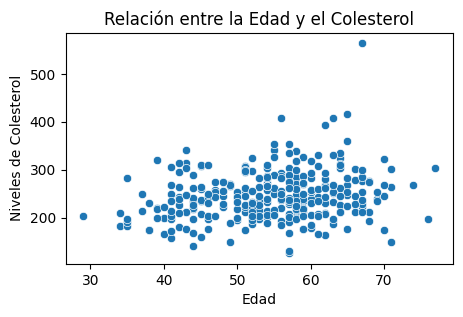

Coeficiente de correlación de Pearson: 0.2136779565595619
Valor p: 0.00017862864341448885


In [16]:
from scipy.stats import pearsonr

plt.figure(figsize=(5, 3))
sns.scatterplot(x=df['age'], y=df['chol'])
plt.title("Relación entre la Edad y el Colesterol")
plt.xlabel("Edad")
plt.ylabel("Niveles de Colesterol")
plt.show()

correlation, p_value = pearsonr(df['age'], df['chol'])

print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

La correlación me indica un valor de 0.21 correlación debil pero positiva, es decir, que la edad esta ligada a que los niveles de colesterol suban con el paso de los años.

por otro lado, el valor "p", me indica que si el valor es menor a 0.005 es que hay una relación entre ambas variables (edad y colesterol) y que no se trata de un resultado al azar. 

-----------

### Modelo predictivo: para saber que tan probable es que una persona sufra un ataque cardiaco

A traves de un modelo de regresión logistica,
- Separo las variales independientes de las que son dependientes (lo que queremos predecir)
- Realizo la división del dataset para tener un conjunto de entrenamiento y un conjunto de prueba, en este caso aplico un 80% para entrenar el modelo y un 20% de prueba.

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalización de los datos

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenamiento de un modelo de clasificación:

In [19]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

Evaluación del modelo:

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizo una prediccioón
y_pred = modelo.predict(X_test)

# Evaluo el rendimiento
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))   # para saber el numero de Verdaderos positivos (V+), V-, F+ y F-
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.8524590163934426

Matriz de confusión:
 [[25  4]
 [ 5 27]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Como resultado tenemos que:

Mediante la Precisión obtenemos un 85,2% de acierto sobre la proporción total, es decir, el porcentaje de las predicciones del modelo que fueron acertadas.

 El resultado que arroja la matriz de confusión:
- 25 (Verdaderos Negativos - TN): El modelo predijo correctamente 25 veces que la persona no tendría un ataque cardíaco.
- 4 (Falsos Positivos - FP): El modelo predijo incorrectamente 4 veces que la persona tendría un ataque cardíaco cuando en realidad no lo tendría.
- 5 (Falsos Negativos - FN): El modelo predijo incorrectamente 5 veces que la persona no tendría un ataque cardíaco cuando en realidad sí lo tendría.
- 27 (Verdaderos Positivos - TP): El modelo predijo correctamente 27 veces que la persona tendría un ataque cardíaco.

Informe de clasificacón:
- Accuracy: 0.85: El modelo tiene una precisión general del 85%, es decir, el 85% de las predicciones totales fueron correctas.

--------------

Comparativa con un Modelo de Random Forest:

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Precisión del modelo Random Forest:", accuracy_score(y_test, y_pred_rf))

Precisión del modelo Random Forest: 0.8360655737704918


El modelo de Random Forest me da un porcentaje del 83,6% de precisión, un poco por debajo del modelo de Regresión.

### Conclusiones finales:

En este proyecto, desarrollé y evalué modelos predictivos para estimar el riesgo de ataques cardíacos utilizando datos médicos clave, como la edad, el sexo, la presión arterial y el colesterol. Comencé implementando un modelo de Regresión Logística, que resultó fácil de interpretar y proporcionó una buena base inicial para entender las relaciones entre las variables.

Luego, implementé un modelo más avanzado, Random Forest, que logró una precisión del 83.61% al capturar relaciones más complejas y no lineales entre los factores de riesgo. Este modelo demostró ser más eficaz en términos de predicción.

En resumen, el proyecto muestra cómo diferentes enfoques de machine learning pueden ayudar a identificar factores importantes en la predicción de enfermedades cardíacas y destaca el equilibrio necesario entre precisión y facilidad de interpretación, algo fundamental en aplicaciones médicas.